Proyek Pertama: Membuat Model NLP dengan Tensorflow
<br>Nama: Sheila Amalia Burhanudin
<br>Username: sheilaamalia
<br>Email: sheilaamalia85@gmail.com
<br>Dataset from Kaggle (https://www.kaggle.com/kulitekno/tokopedia-product-review-category-food-and-drink)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# import dataset
df = pd.read_csv('dataset_review_tokped_labelled.csv')
df.head()

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral


In [ ]:
print('Jumlah baris: ', df.shape[0])
print('Kategori sentimen: ', df['Sentiment'].unique())

Jumlah baris:  4060
Kategori sentimen:  ['positive' 'negative' 'neutral']


In [ ]:
# One Hot Encoding untuk kolom Sentiment karena label berupa data kategorikal
category = pd.get_dummies(df.Sentiment)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='Sentiment')
df_new.head()

,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0


In [ ]:
# mengubah data df menjadi tipe data numpy array agar dapat diproses oleh model
review = df_new['Review'].values
label = df_new[['negative', 'neutral', 'positive']].values

In [ ]:
# membagi data menjadi data train dan test
review_train, review_test, label_train, label_test = train_test_split(review, label, test_size=0.2)

In [ ]:
# proses tokenisasi, sequence, dan padding
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(review_train)
tokenizer.fit_on_texts(review_test)

sequence_train = tokenizer.texts_to_sequences(review_train)
sequence_test = tokenizer.texts_to_sequences(review_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [ ]:
# arsitektur model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(128), # layer LSTM
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# membuat fungsi callback dengan batas akurasi 97%
batas_akurasi = 97e-2
class custom_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= batas_akurasi:
            print('\nEpoch ke-', epoch, '\nAkurasi model telah mencapai = %2.2f%%' %(logs['accuracy']*100), ', proses latih berhenti.')
            self.model.stop_training = True

In [ ]:
# melatih model
num_epochs = 30
history = model.fit(padded_train,
                    label_train, 
                    epochs=num_epochs,
                    validation_data=(padded_test,label_test), 
                    verbose=2,
                    callbacks = [custom_callbacks()])

Epoch 1/30
102/102 - 19s - loss: 0.8052 - accuracy: 0.7124 - val_loss: 0.6962 - val_accuracy: 0.7180
Epoch 2/30
102/102 - 17s - loss: 0.5261 - accuracy: 0.7925 - val_loss: 0.5277 - val_accuracy: 0.7808
Epoch 3/30
102/102 - 17s - loss: 0.3406 - accuracy: 0.8710 - val_loss: 0.5252 - val_accuracy: 0.8030
Epoch 4/30
102/102 - 17s - loss: 0.2268 - accuracy: 0.9181 - val_loss: 0.5562 - val_accuracy: 0.8177
Epoch 5/30
102/102 - 17s - loss: 0.1563 - accuracy: 0.9495 - val_loss: 0.7070 - val_accuracy: 0.8091
Epoch 6/30
102/102 - 17s - loss: 0.1315 - accuracy: 0.9603 - val_loss: 0.8826 - val_accuracy: 0.8042
Epoch 7/30
102/102 - 17s - loss: 0.0890 - accuracy: 0.9723 - val_loss: 0.7983 - val_accuracy: 0.7906

Epoch ke- 6 
Akurasi model telah mencapai = 97.23% , proses latih berhenti.


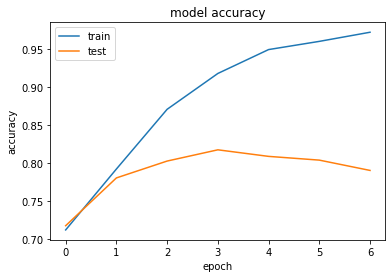

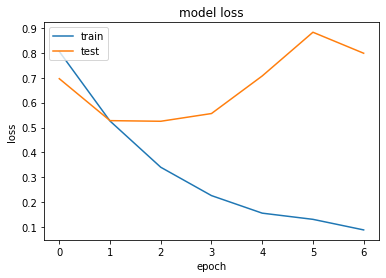

In [ ]:
# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()